In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
data1 = np.array([18.4, 19.1, 17.9, 18.7, 18.3])  # Sample 1
data2 = np.array([20.2, 20.5, 20.1, 20.3, 20.4])  # Sample 2

In [4]:
t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=True)

In [5]:


# mean difference
mean_diff = np.mean(data1) - np.mean(data2)

# sample sizes
n1, n2 = len(data1), len(data2)

# sample variances
s1_sq, s2_sq = np.var(data1, ddof=1), np.var(data2, ddof=1)

# pooled variance
sp_sq = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2)

# standard error using pooled variance
std_err = np.sqrt(sp_sq * (1/n1 + 1/n2))

# degrees of freedom
df = n1 + n2 - 2

# 95% confidence interval
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

In [6]:
print(f"Sample 1 Mean: {np.mean(data1):.2f}")
print(f"Sample 2 Mean: {np.mean(data2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")


Sample 1 Mean: 18.48
Sample 2 Mean: 20.30
t-Statistic: -8.54
Degrees of Freedom: 8.00
p-Value: 0.0000
Confidence Interval of Mean Difference: [-2.31, -1.33]


In [7]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

Reject the null hypothesis. The means of the two samples are significantly different.


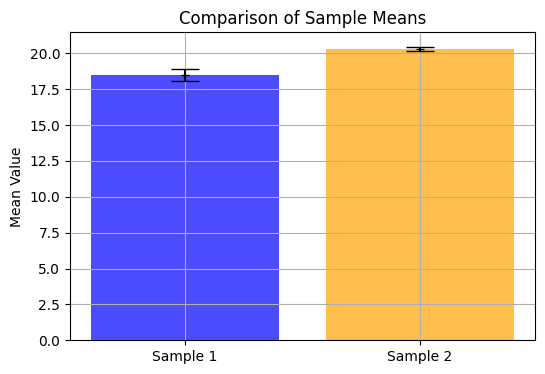

In [8]:
plt.figure(figsize=(6, 4))  # Set the figure size
plt.bar(["Sample 1", "Sample 2"], [np.mean(data1), np.mean(data2)], color=['blue', 'orange'], alpha=0.7)
plt.errorbar([0, 1], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1), np.std(data2)], fmt='k_', capsize=10)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()